In [43]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as p
import warnings 
import numpy as npy
warnings.filterwarnings('ignore')

In [44]:
data_set=pd.read_csv(r"C:\Users\ramco\Downloads\online+shoppers+purchasing+intention+dataset\online_shoppers_intention.csv")
data_set.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [45]:
print('no of instances and features',data_set.shape)

no of instances and features (12330, 18)


Explorary Data Analysis

Data preprocessing

In [46]:
independent_features=data_set.iloc[:,:-1]
dependent_feature=data_set.iloc[:,-1]

In [47]:
data_set.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [48]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [49]:
data_set.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [50]:
data_set=data_set.dropna()

Data Analysis

Univariant Analysis

<Axes: >

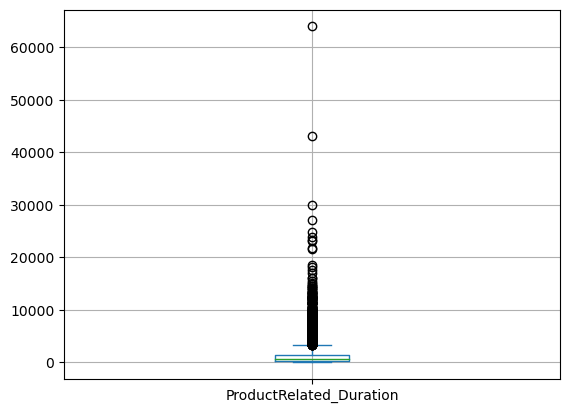

In [51]:
data_set['ProductRelated_Duration'].plot.box(grid=True)

<Axes: >

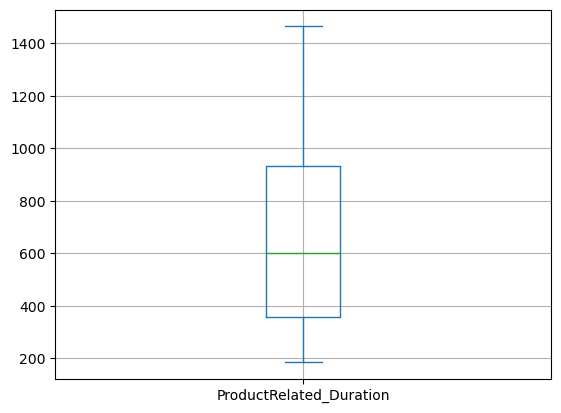

In [52]:
data_set=data_set[(data_set['ProductRelated_Duration']>npy.percentile(data_set['ProductRelated_Duration'],25)) & (data_set['ProductRelated_Duration']<npy.percentile(data_set['ProductRelated_Duration'],75))]
data_set['ProductRelated_Duration'].plot.box(grid=True)

<Axes: xlabel='ProductRelated', ylabel='Density'>

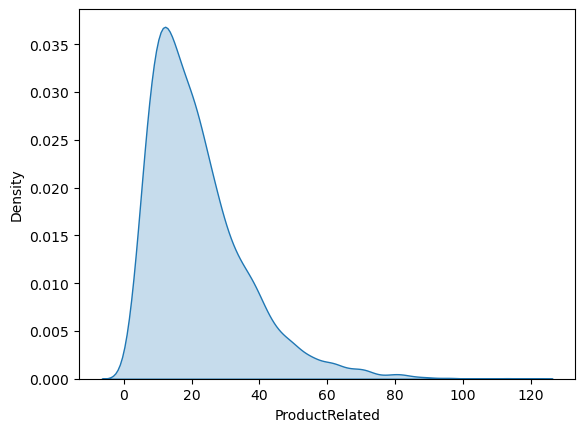

In [53]:
sbn.kdeplot(data=data_set, x='ProductRelated', shade=True)

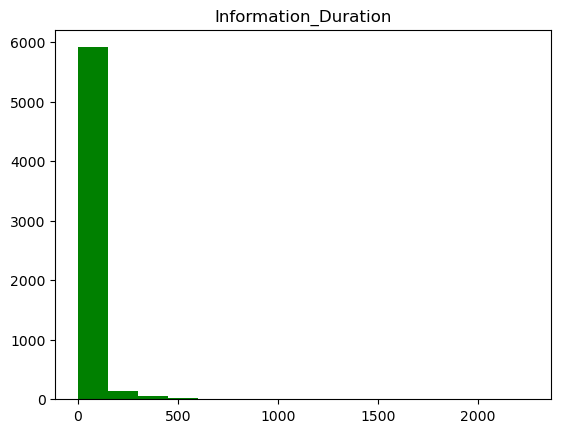

In [54]:
p.hist(data_set['Informational_Duration'],bins=15,color='green')
p.title('Information_Duration')
p.show()

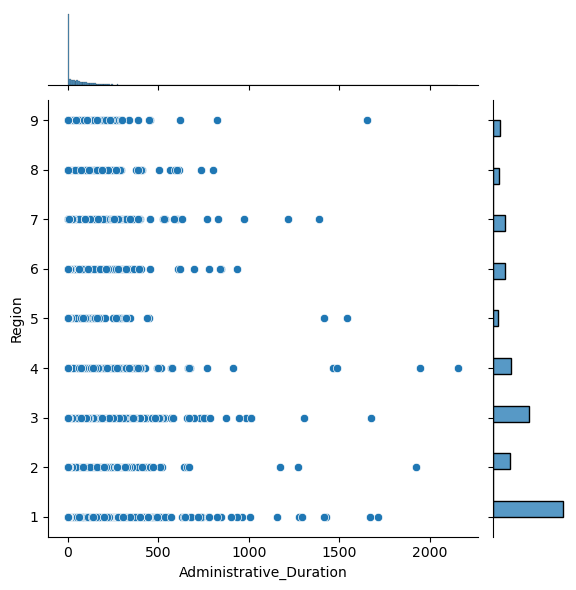

In [55]:
sbn.jointplot(data=data_set, x='Administrative_Duration', y='Region',kind='scatter')

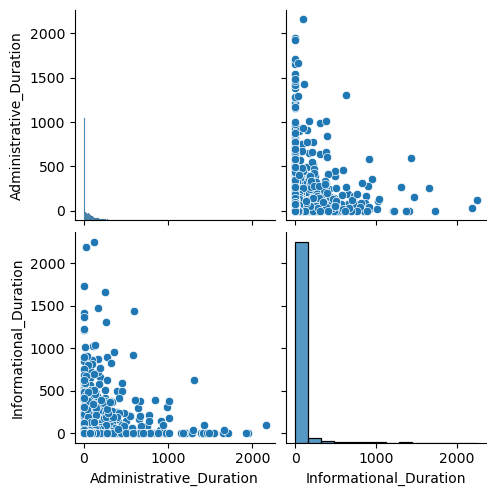

In [56]:
sbn.pairplot(data=data_set, vars=['Administrative_Duration','Informational_Duration'])

Feature Extraction 

In [60]:
from sklearn.preprocessing import LabelEncoder
data_set['Revenue']=LabelEncoder().fit_transform(data_set['Revenue'])
data_set['Weekend']=LabelEncoder().fit_transform(data_set['Weekend'])

In [63]:
X=pd.get_dummies(data_set)
X

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
4,0,0.00,0,0.0,10,627.50000,0.020000,0.050000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
9,0,0.00,0,0.0,3,738.00000,0.000000,0.022222,0.0,0.4,...,0,0,0,0,0,0,0,0,0,1
10,0,0.00,0,0.0,3,395.00000,0.000000,0.066667,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
11,0,0.00,0,0.0,16,407.75000,0.018750,0.025833,0.0,0.4,...,0,0,0,0,0,0,0,0,0,1
12,0,0.00,0,0.0,7,280.50000,0.000000,0.028571,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12323,2,64.75,0,0.0,44,1157.97619,0.000000,0.013953,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1
12324,0,0.00,1,0.0,16,503.00000,0.000000,0.037647,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1
12326,0,0.00,0,0.0,5,465.75000,0.000000,0.021333,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1
12327,0,0.00,0,0.0,6,184.25000,0.083333,0.086667,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1


Feature Scaling

In [66]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler().fit(X)
X_scaled=ss.transform(X)
X_scaled

array([[-0.73653603, -0.48960943, -0.37412542, ..., -0.45857238,
        -0.0733654 ,  0.46709937],
       [-0.73653603, -0.48960943, -0.37412542, ..., -0.45857238,
        -0.0733654 ,  0.46709937],
       [-0.73653603, -0.48960943, -0.37412542, ..., -0.45857238,
        -0.0733654 ,  0.46709937],
       ...,
       [-0.73653603, -0.48960943, -0.37412542, ..., -0.45857238,
        -0.0733654 ,  0.46709937],
       [-0.73653603, -0.48960943, -0.37412542, ..., -0.45857238,
        -0.0733654 ,  0.46709937],
       [ 0.67834768,  0.02665005, -0.37412542, ..., -0.45857238,
        -0.0733654 ,  0.46709937]])

Feature Selection 

In [74]:
from sklearn.feature_selection import SelectKBest,f_classif
k_best = SelectKBest(score_func=f_classif, k=20)
# Apply SelectKBest to fit and transform the data
X_new = k_best.fit_transform(X, data_set['Revenue'])
# Get the indices of the selected features
selected_indices = k_best.get_support(indices=True)
# Print the selected feature names and scores
feature_names = data_set.columns
selected_features = [feature_names[i] for i in selected_indices]
feature_scores = k_best.scores_[selected_indices]
for feature, score in zip(selected_features, feature_scores):
    print(f"{feature}: {score}")

Administrative: 25.71028498305389
Administrative_Duration: 16.30979683344756
Informational: 7.979965783872869
ProductRelated: 25.943895779690912
ProductRelated_Duration: 98.33469150990946
BounceRates: 119.95110946741993
ExitRates: 215.37714680917
PageValues: 2709.663784275779
SpecialDay: 26.937912017088873
Browser: 6.366683752714634
Weekend: 6.265387088360694
Month_Aug: 3.235141287248653
Month_Feb: 12.272457110238102
Month_Mar: 19.00685279474722
Month_May: 3.8213685952413714
Month_Nov: 41.94499052752412
Month_Oct: 5.368332751490418
VisitorType_New_Visitor: 135.7478438006663
VisitorType_Other: 4.337110043117056
VisitorType_Returning_Visitor: 142.0747791214348


In [75]:
X=data_set[selected_features]
X

,Administrative,Administrative_Duration,Informational,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Browser,Weekend,Month_Aug,Month_Feb,Month_Mar,Month_May,Month_Nov,Month_Oct,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
4,0,0.00,0,10,627.50000,0.020000,0.050000,0.0,0.0,3,1,0,1,0,0,0,0,0,0,1
9,0,0.00,0,3,738.00000,0.000000,0.022222,0.0,0.4,4,0,0,1,0,0,0,0,0,0,1
10,0,0.00,0,3,395.00000,0.000000,0.066667,0.0,0.0,1,0,0,1,0,0,0,0,0,0,1
11,0,0.00,0,16,407.75000,0.018750,0.025833,0.0,0.4,1,0,0,1,0,0,0,0,0,0,1
12,0,0.00,0,7,280.50000,0.000000,0.028571,0.0,0.0,1,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12323,2,64.75,0,44,1157.97619,0.000000,0.013953,0.0,0.0,2,0,0,0,0,0,1,0,0,0,1
12324,0,0.00,1,16,503.00000,0.000000,0.037647,0.0,0.0,2,0,0,0,0,0,1,0,0,0,1
12326,0,0.00,0,5,465.75000,0.000000,0.021333,0.0,0.0,2,1,0,0,0,0,1,0,0,0,1
12327,0,0.00,0,6,184.25000,0.083333,0.086667,0.0,0.0,2,1,0,0,0,0,1,0,0,0,1


Train Test Split

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,data_set['Revenue'],test_size=0.25,random_state=0)

Model Selection 

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score
# Create a decision tree classifier
tree_clf = DecisionTreeClassifier()
# Define the hyperparameter grid
param_grid = {
    'max_depth': npy.arange(1, 11),
    'min_samples_split': npy.arange(2, 21),
    'min_samples_leaf': npy.arange(1, 11)
}
# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(tree_clf, param_grid, n_iter=50, cv=5, random_state=42)
random_search.fit(X_train, y_train)
# Get the best model
best_model = random_search.best_estimator_
# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

Accuracy: 0.8916288124594419
Best Hyperparameters: {'min_samples_split': 6, 'min_samples_leaf': 4, 'max_depth': 2}


Decision Tree Classification 

In [78]:
d=DecisionTreeClassifier(min_samples_split= 6, min_samples_leaf= 4, max_depth= 2).fit(X_train,y_train)
dtc_predictions=d.predict(X_test)

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
# Calculate accuracy
accuracy = accuracy_score(y_test, dtc_predictions)
print("decision tree classificaiton Accuracy:", accuracy)
# Calculate precision
precision = precision_score(y_test, dtc_predictions, average='weighted')
print("decision tree classificaiton Precision:", precision)
# Calculate recall
recall = recall_score(y_test,dtc_predictions, average='weighted')
print("decision tree classificaiton Recall:", recall)
# Calculate F1 score
f1 = f1_score(y_test, dtc_predictions, average='weighted')
print("decision tree classificaiton F1 Score:", f1)
cm = confusion_matrix(y_test,dtc_predictions)
print("decision tree classificaiton Confusion Matrix:")
print(cm)

decision tree classificaiton Accuracy: 0.8916288124594419
decision tree classificaiton Precision: 0.883717848369293
decision tree classificaiton Recall: 0.8916288124594419
decision tree classificaiton F1 Score: 0.8843617670221784
decision tree classificaiton Confusion Matrix:
[[1237   48]
 [ 119  137]]


Decision Tree Classification AUC: 0.7489010821984435


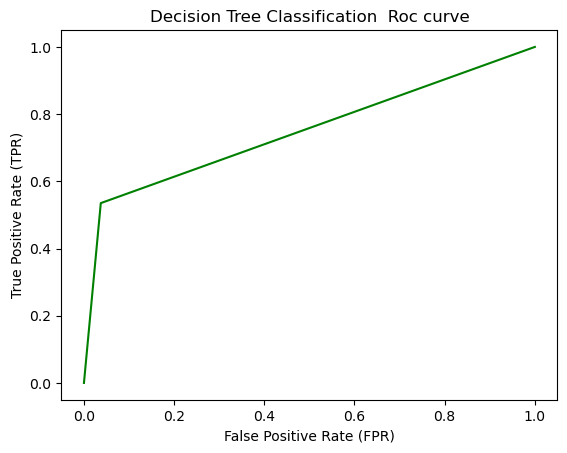

In [87]:
# Calculate the false positive rate (FPR), true positive rate (TPR), and threshold
fpr, tpr, thresholds = roc_curve(y_test, dtc_predictions)
# Compute the Area Under the Curve (AUC)
auc = roc_auc_score(y_test, dtc_predictions)
print("Decision Tree Classification AUC:", auc)
p.plot(fpr, tpr, color='green')
p.xlabel('False Positive Rate (FPR)')
p.ylabel('True Positive Rate (TPR)')
p.title('Decision Tree Classification  Roc curve')
p.show()

Random Forest Classification 

In [88]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier().fit(X_train,y_train)
rfc_predictions=rfc.predict(X_test)

In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,roc_curve
# Calculate accuracy
accuracy = accuracy_score(y_test, rfc_predictions)
print("Random Forest classificaiton Accuracy:", accuracy)
# Calculate precision
precision = precision_score(y_test, rfc_predictions, average='weighted')
print("Random Forest classificaiton Precision:", precision)
# Calculate recall
recall = recall_score(y_test,rfc_predictions, average='weighted')
print("Random Forest classificaiton Recall:", recall)
# Calculate F1 score
f1 = f1_score(y_test, rfc_predictions, average='weighted')
print("Random Forest classificaiton F1 Score:", f1)
cm = confusion_matrix(y_test,rfc_predictions)
print("Random Forest classificaiton Confusion Matrix:")
print(cm)

Random Forest classificaiton Accuracy: 0.9059052563270603
Random Forest classificaiton Precision: 0.9014825594850095
Random Forest classificaiton Recall: 0.9059052563270603
Random Forest classificaiton F1 Score: 0.9027293622934256
Random Forest classificaiton Confusion Matrix:
[[1232   53]
 [  92  164]]


Random Forest Classification AUC: 0.7996899319066147


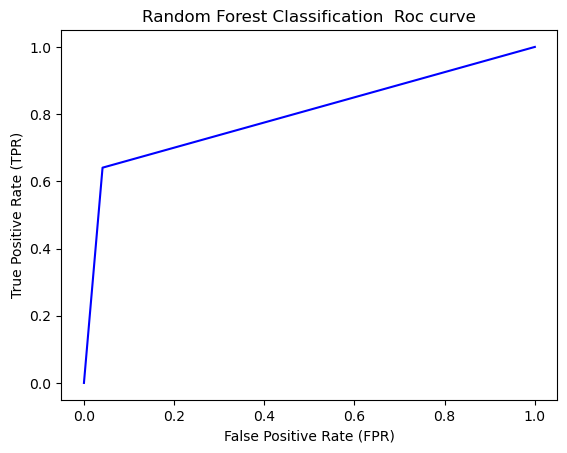

In [98]:
# Calculate the false positive rate (FPR), true positive rate (TPR), and threshold
fpr, tpr, thresholds = roc_curve(y_test, rfc_predictions)
# Compute the Area Under the Curve (AUC)
auc = roc_auc_score(y_test, rfc_predictions)
print("Random Forest Classification AUC:", auc)
p.plot(fpr, tpr, color='blue')
p.xlabel('False Positive Rate (FPR)')
p.ylabel('True Positive Rate (TPR)')
p.title('Random Forest Classification  Roc curve')
p.show()

Support Vector Classification 

In [93]:
from sklearn.svm import SVC
svc=SVC(kernel='sigmoid').fit(X_train,y_train)
svc_predictions=svc.predict(X_test)

In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,roc_curve
# Calculate accuracy
accuracy = accuracy_score(y_test, svc_predictions)
print("Support Vector classificaiton Accuracy:", accuracy)
# Calculate precision
precision = precision_score(y_test, svc_predictions, average='weighted')
print("Support Vector classificaiton Precision:", precision)
# Calculate recall
recall = recall_score(y_test,svc_predictions, average='weighted')
print("Support Vector classificaiton Recall:", recall)
# Calculate F1 score
f1 = f1_score(y_test, svc_predictions, average='weighted')
print("Support Vector classificaiton F1 Score:", f1)
cm = confusion_matrix(y_test,svc_predictions)
print("Support Vector classificaiton Confusion Matrix:")
print(cm)

Support Vector classificaiton Accuracy: 0.7560025957170668
Support Vector classificaiton Precision: 0.7449313895230764
Support Vector classificaiton Recall: 0.7560025957170668
Support Vector classificaiton F1 Score: 0.7502596631551807
Support Vector classificaiton Confusion Matrix:
[[1111  174]
 [ 202   54]]


Support Vector Classification AUC: 0.537764469844358


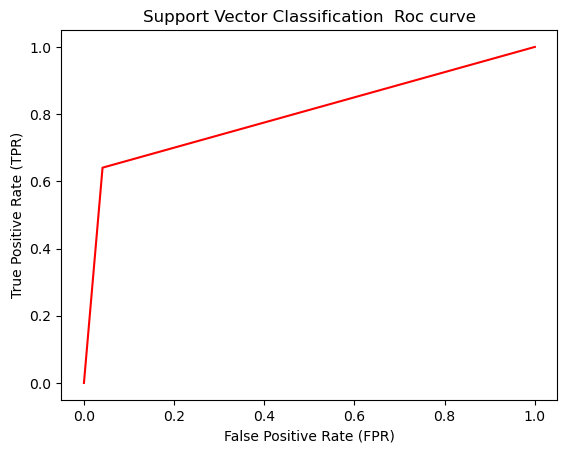

In [97]:
# Calculate the false positive rate (FPR), true positive rate (TPR), and threshold
fpr, tpr, thresholds = roc_curve(y_test, rfc_predictions)
# Compute the Area Under the Curve (AUC)
auc = roc_auc_score(y_test, svc_predictions)
print("Support Vector Classification AUC:", auc)
p.plot(fpr, tpr, color='red')
p.xlabel('False Positive Rate (FPR)')
p.ylabel('True Positive Rate (TPR)')
p.title('Support Vector Classification  Roc curve')
p.show()